## Observations and Insights 

In [116]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comb_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
comb_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [117]:
# Checking the number of mice in the DataFrame.
total_mice = comb_df['Mouse ID'].nunique()
total_mice

249

In [118]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = comb_df[comb_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [119]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = comb_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [120]:
# Checking the number of mice in the clean DataFrame.
total_unique_mice = clean_df["Mouse ID"].nunique()
total_unique_mice

249

In [121]:
## Summary Statistics

In [122]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_table = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": sem})
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [123]:
## Bar Plots

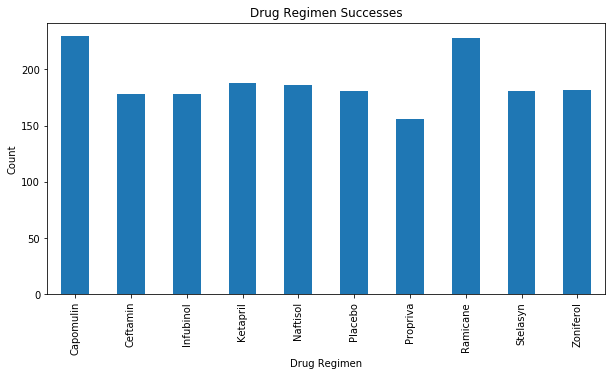

In [124]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
regimen_data = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data.plot(kind="bar", figsize=(10,5))

# Set all titles on chart
plt.title("Drug Regimen Successes")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

# Show the chart
plt.show()

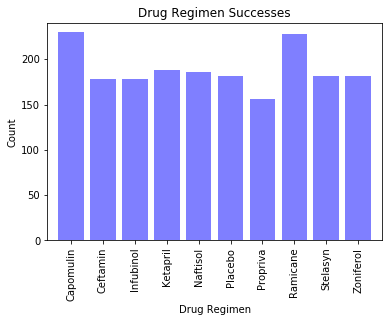

In [125]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# Save drug regimens column to list
drug_regimens = summary_table.index.tolist()

# Save regiment counts to a list
regimen_count = (clean_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()

# Set x-axis to length of total regimens
x_axis = np.arange(len(drug_regimens))

# Set bar chart
plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimens,  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(regimen_count)+10)

# Set all titles on chart
plt.title("Drug Regimen Successes")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

# Show the chart
plt.show()

## Pie Plots

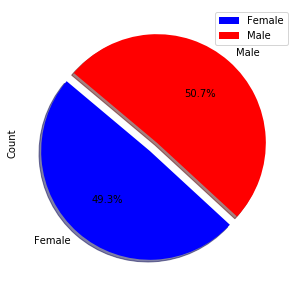

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(clean_df.groupby(["Sex"]).count()).reset_index()

# Show only sex and count columns on dataframe
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})

# Plot the values on a pie plot
colors = ['blue', 'red']
explode = (0.1, 0)
gender_df.plot(kind='pie',y="Count",figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%", labels=gender_df['Sex'])

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [128]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [129]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [130]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [131]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [132]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
